In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
t = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/외래관광객조사_2024_데이터.csv', encoding='cp949')
t.shape


(16216, 402)

In [40]:
tmp = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/만족도조사.csv')
# tmp[tmp.str.contains('문')]

C:\Users\sopi0\AppData\Local\Temp\ipykernel_19180\412299161.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/만족도조사.csv')


In [ ]:
# ⚠️ '만족도조사.csv'가 저장된 경로로 바꾸기
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv')
df.head()

C:\Users\sopi0\AppData\Local\Temp\ipykernel_19180\2067808158.py:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/만족도조사.csv')


,아이디,한국 방문횟수(평균),한국 방문횟수(카테고리),한국 방문횟수(재방문),여행 형태,문1. 주요 방한 목적,문1-1. 한국여행 관심 계기_1순위,문1-1. 한국여행 관심 계기_2순위,문1-1. 한국여행 관심 계기_3순위,문2. 방문을 고려한 아시아 국가_1순위,...,문14. 타인 추천 의향,월별,분기별,국가별,성별,연령별,방한목적별,방한횟수별,여행형태별,가중치
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.333757
2,8.0,2.0,2.0,5.0,1,5,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.838755
3,10.0,1.0,1.0,NaN,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.272342
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.434506


<!-- # 1. 변수 제거 & 주요 방한 목적==1 & 장기체류자 제거 -->

In [ ]:
col = ['아이디', '국가별','성별','연령별','문1. 주요 방한 목적', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1순위',
       '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위', '문7. 여행 동반자(1. 혼자 방문)', '문7. 여행 동반자(2. 배우자/파트너)',
       '문7. 여행 동반자(3. 부모님)', '문7. 여행 동반자(4. 자녀)', '문7. 여행 동반자(5. 그 외 가족/친지)', '문7. 여행 동반자(6. 친구)', 
       '문7. 여행 동반자(7. 직장 동료)', '문7. 여행 동반자(8. 기타)', '문7-1. 동반자 수(본인제외)',
        '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)', '문9-3. 총 체재기간_61일 이상 결측', 
        '문9-4. 시도별 체재기간_서울', '문9-4. 시도별 체재기간_경기', '문9-4. 시도별 체재기간_인천', '문9-4. 시도별 체재기간_강원',
        '문9-4. 시도별 체재기간_대전', '문9-4. 시도별 체재기간_충북', '문9-4. 시도별 체재기간_충남', '문9-4. 시도별 체재기간_세종', 
        '문9-4. 시도별 체재기간_경북', '문9-4. 시도별 체재기간_경남', '문9-4. 시도별 체재기간_대구', '문9-4. 시도별 체재기간_울산',
        '문9-4. 시도별 체재기간_부산', '문9-4. 시도별 체재기간_광주', '문9-4. 시도별 체재기간_전북', '문9-4. 시도별 체재기간_전남',
        '문9-4. 시도별 체재기간_제주',
        '문9-5. 주요 이용 숙박시설(1. 호텔)', '문9-5. 주요 이용 숙박시설(2. 모텔/여관)', '문9-5. 주요 이용 숙박시설(3. 콘도미니엄/리조트)',
        '문9-5. 주요 이용 숙박시설(4. 게스트하우스/호스텔)', '문9-5. 주요 이용 숙박시설(5. 민박/펜션)', '문9-5. 주요 이용 숙박시설(6. 학교/회사 기숙사, 연수원 등)',
        '문9-5. 주요 이용 숙박시설(7. 친척 또는 친구 집)', '문9-5. 주요 이용 숙박시설(8. 기타)', '문9-5. 주요 이용 숙박시설(9. 숙박하지 않음)',
        '문9-5. 숙박시설별 숙박기간(60박 이상 결측)_호텔', '문9-5. 숙박시설별 숙박기간(60박 이상 결측)_모텔/여관', '문9-5. 숙박시설별 숙박기간(60박 이상 결측)_콘도미니엄/리조트',
        '문9-5. 숙박시설별 숙박기간(60박 이상 결측)_게스트하우스/호스텔', '문9-5. 숙박시설별 숙박기간(60박 이상 결측)_민박/펜션',
        '문9-5. 숙박시설별 숙박기간(60박 이상 결측)_학교/회사 기숙사, 연수원 등', '문9-5. 숙박시설별 숙박기간(60박 이상 결측)_친척 또는 친구 집',
        '문9-5. 숙박시설별 숙박기간(60박 이상 결측)_기타'
        ]

In [ ]:
df1 = df[col]
df1.head()

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,문7. 여행 동반자(1. 혼자 방문),...,문9-5. 주요 이용 숙박시설(8. 기타),문9-5. 주요 이용 숙박시설(9. 숙박하지 않음),문9-5. 숙박시설별 숙박기간(60박 이상 결측)_호텔,문9-5. 숙박시설별 숙박기간(60박 이상 결측)_모텔/여관,문9-5. 숙박시설별 숙박기간(60박 이상 결측)_콘도미니엄/리조트,문9-5. 숙박시설별 숙박기간(60박 이상 결측)_게스트하우스/호스텔,문9-5. 숙박시설별 숙박기간(60박 이상 결측)_민박/펜션,"문9-5. 숙박시설별 숙박기간(60박 이상 결측)_학교/회사 기숙사, 연수원 등",문9-5. 숙박시설별 숙박기간(60박 이상 결측)_친척 또는 친구 집,문9-5. 숙박시설별 숙박기간(60박 이상 결측)_기타
0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,24.0,NaN
1,7.0,1.0,1.0,3.0,2,4.0,2.0,3.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
2,8.0,4.0,2.0,1.0,5,2.0,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,5.0,1.0,5.0,3,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.0,1.0,2.0,4.0,2,3.0,8.0,2.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df1[df1['문1. 주요 방한 목적']==1]
df1.shape

(9693, 54)

In [ ]:
df1 = df1.dropna(subset=['문9-3. 총 체재기간_61일 이상 결측'])
df1.shape

(9652, 54)

<!-- # 2. '숙박시설_그룹' 변수 생성

주연이 코드 -->

In [ ]:
df2 = df1.copy()
df2.shape

(9652, 54)

In [38]:
# # 숙박시설 관련 컬럼 자동 선택
# stay_type_cols = [c for c in df.columns if c.startswith('문9-5. 주요 이용 숙박시설(')]
# stay_days_cols = [c for c in df.columns if c.startswith('문9-5. 숙박시설별 숙박기간(60박 이상 결측)_')]
# # 숙박시설명 통일용 매핑 (괄호 안 이름 기준으로 동일하게 맞춰줌)
# stay_mapping = {col.split('(')[-1].replace(')', ''): col for col in stay_days_cols}
# def merge_stay_types(row):
#     # 선택된 숙박시설 리스트
#     selected = [col.split('(')[-1].replace(')', '') for col in stay_type_cols if not pd.isna(row[col])]
#     # 선택된 숙박시설이 없는 경우
#     if len(selected) == 0:
#         return np.nan
#     # 한 개만 선택된 경우
#     elif len(selected) == 1:
#         return selected[0]
#     # 복합형인 경우: 체류일수 기준으로 가장 오래 머문 숙박시설 선택
#     else:
#         durations = {}
#         for s in selected:
#             col_name = stay_mapping.get(s)
#             if col_name in row:
#                 durations[s] = row[col_name]
#         # 체류일수가 있는 숙박시설 중 가장 오래 머문 곳 선택
#         if len(durations) > 0:
#             return max(durations, key=durations.get)
#         else:
#             # 체류일수 정보 없으면 그냥 합쳐서 반환
#             return '+'.join(selected)
# # 통합 컬럼 생성
# df2['숙박시설_그룹'] = df2.apply(merge_stay_types, axis=1)
# # 결과 확인
# print(df2['숙박시설_그룹'].value_counts(dropna=False).head(20))

In [37]:
# df.loc[:,df.columns.str.contains('문9-5. 숙박시설별 숙박기간')]

In [36]:
# # 숙박시설 관련 컬럼 자동 선택
# stay_type_cols = [c for c in df.columns if c.startswith('문9-5. 주요 이용 숙박시설(')]
# stay_days_cols = [c for c in df.columns if c.startswith('문9-5. 숙박시설별 숙박기간_')]
# # 숙박시설명 통일용 매핑 (괄호 안 이름 기준으로 동일하게 맞춰줌)
# stay_mapping = {col.split('(')[-1].replace(')', ''): col for col in stay_days_cols}
# def merge_stay_types(row):
#     # 선택된 숙박시설 리스트
#     selected = [col.split('(')[-1].replace(')', '') for col in stay_type_cols if not pd.isna(row[col])]
#     # 선택된 숙박시설이 없는 경우
#     if len(selected) == 0:
#         return np.nan
#     # 한 개만 선택된 경우
#     elif len(selected) == 1:
#         return selected[0]
#     # 복합형인 경우: 체류일수 기준으로 가장 오래 머문 숙박시설 선택
#     else:
#         durations = {}
#         for s in selected:
#             col_name = stay_mapping.get(s)
#             if col_name in row:
#                 durations[s] = row[col_name]
#         # 체류일수가 있는 숙박시설 중 가장 오래 머문 곳 선택
#         if len(durations) > 0:
#             return max(durations, key=durations.get)
#         else:
#             # 체류일수 정보 없으면 그냥 합쳐서 반환
#             return '+'.join(selected)
# # 통합 컬럼 생성
# df2['숙박시설_그룹'] = df2.apply(merge_stay_types, axis=1)
# # 결과 확인
# print(df2['숙박시설_그룹'].value_counts(dropna=False).head(20))

In [ ]:
df[(df['문9-5. 주요 이용 숙박시설(1. 호텔)']== 1.0) & df['문9-5. 주요 이용 숙박시설(4. 게스트하우스/호스텔)']== 4.0]['문9-5. 숙박시설별 숙박기간_게스트하우스/호스텔'].isna().sum()

In [34]:
# df2 = df2.drop(stay_type_cols, axis=1)
# df2 = df2.drop(stay_days_cols, axis=1)
# df2.shape

In [ ]:
# df2.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문7. 여행 동반자(1. 혼자 방문)', '문7. 여행 동반자(2. 배우자/파트너)', '문7. 여행 동반자(3. 부모님)',
       '문7. 여행 동반자(4. 자녀)', '문7. 여행 동반자(5. 그 외 가족/친지)', '문7. 여행 동반자(6. 친구)',
       '문7. 여행 동반자(7. 직장 동료)', '문7. 여행 동반자(8. 기타)', '문7-1. 동반자 수(본인제외)',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '문9-4. 시도별 체재기간_서울', '문9-4. 시도별 체재기간_경기',
       '문9-4. 시도별 체재기간_인천', '문9-4. 시도별 체재기간_강원', '문9-4. 시도별 체재기간_대전',
       '문9-4. 시도별 체재기간_충북', '문9-4. 시도별 체재기간_충남', '문9-4. 시도별 체재기간_세종',
       '문9-4. 시도별 체재기간_경북', '문9-4. 시도별 체재기간_경남', '문9-4. 시도별 체재기간_대구',
       '문9-4. 시도별 체재기간_울산', '문9-4. 시도별 체재기간_부산', '문9-4. 시도별 체재기간_광주',
       '문9-4. 시도별 체재기간_전북', '문9-4. 시도별 체재기간_전남', '문9-4. 시도별 체재기간_제주',
       '숙박시설_그룹'],
      dtype='object')

<!-- # 3. '여행그룹' 변수 생성 -->

In [ ]:
# 1. 컬럼 선택
stay_type_cols = [c for c in df1.columns if c.startswith('문9-5. 주요 이용 숙박시설(')]
stay_days_cols = [c for c in df1.columns if c.startswith('문9-5. 숙박시설별 숙박기간_')]
# 2. 숙박기간 결측치 처리 및 숫자형 변환
df1[stay_days_cols] = df1[stay_days_cols].fillna(0).astype(float)
# 3. 매핑 딕셔너리 생성 (핵심 수정 부분)
# "1. 호텔" -> "호텔"로 변환하여 매칭
stay_mapping = {}
for t_col in stay_type_cols:
    # 예: '문9-5... (1. 호텔)' -> '1. 호텔'
    full_name = t_col.split('(')[-1].replace(')', '').strip()
    # '1. 호텔' -> '호텔' (번호와 '. ' 제거)
    # 점(.)을 기준으로 쪼개서 뒤에 있는 텍스트만 가져옵니다.
    if '. ' in full_name:
        clean_name = full_name.split('. ', 1)[-1]
    else:
        clean_name = full_name # 번호가 없는 경우 대비
    # 숙박기간 컬럼 찾기 (clean_name으로 끝나는지 확인)
    # 예: '...숙박기간_호텔'은 '호텔'로 끝남 -> 매칭 성공
    for d_col in stay_days_cols:
        if d_col.endswith(f"_{clean_name}"): # _호텔, _모텔/여관 등 정확히 매칭
            stay_mapping[full_name] = d_col
            break
# 4. 함수 정의
def merge_stay_types(row):
    # 선택된 시설 리스트 (예: ['1. 호텔', '7. 친척 또는 친구 집'])
    selected = []
    for col in stay_type_cols:
        if not pd.isna(row[col]) and row[col] != 0:
            name = col.split('(')[-1].replace(')', '').strip()
            selected.append(name)
    if len(selected) == 0:
        return np.nan
    elif len(selected) == 1:
        return selected[0]
    else:
        # 복수 선택 시 기간 비교
        durations = {}
        for s in selected:
            day_col = stay_mapping.get(s) # 매핑된 기간 컬럼 가져오기
            # 매핑된 컬럼이 존재하고 값이 있으면
            if day_col and day_col in row:
                durations[s] = row[day_col]
        # 기간 데이터가 있으면 최대값 선택
        if len(durations) > 0:
            # 값이 모두 0일 경우(데이터 오류 등)를 대비해 max값이 0이어도 선택은 함
            return max(durations, key=durations.get)
        else:
            return '+'.join(selected)
# 5. 적용
df1['숙박시설_그룹'] = df1.apply(merge_stay_types, axis=1)
df1['숙박시설_그룹'].value_counts()

In [ ]:
# df3 = df2.copy()
# df3.shape

(9652, 38)

In [ ]:
# partner_cols = [col for col in df3.columns if col.startswith('문7. 여행 동반자')]
# df3[partner_cols].sum().sort_values(ascending=False)

문7. 여행 동반자(6. 친구)           19308.0
문7. 여행 동반자(5. 그 외 가족/친지)     7060.0
문7. 여행 동반자(2. 배우자/파트너)       4260.0
문7. 여행 동반자(4. 자녀)            4124.0
문7. 여행 동반자(7. 직장 동료)         3717.0
문7. 여행 동반자(3. 부모님)           3150.0
문7. 여행 동반자(1. 혼자 방문)         1906.0
문7. 여행 동반자(8. 기타)             520.0
dtype: float64

In [ ]:
# # 문7 관련 컬럼 추출
# X = df3[partner_cols].fillna(0).astype(int)

# # 0이 아닌 값은 모두 1로 바꾸기 -> 각 1,2,...,8로 저장되어 있음
# X = X.applymap(lambda x: 1 if x != 0 else 0).astype(int)

# # 각 행의 조합
# combo_series = X.apply(lambda row: '+'.join( [col.split('(')[1].replace(')', '') for col, val in row.items() if val == 1]), axis=1)

# # 조합 빈도수
# combo_counts = combo_series.value_counts()
# combo_counts.head(20)

C:\Users\sopi0\AppData\Local\Temp\ipykernel_20432\1232629494.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x != 0 else 0).astype(int)


6. 친구                            2919
1. 혼자 방문                         1906
2. 배우자/파트너                       1306
5. 그 외 가족/친지                      754
3. 부모님                            533
7. 직장 동료                          459
2. 배우자/파트너+4. 자녀                  423
4. 자녀                             322
3. 부모님+5. 그 외 가족/친지               310
2. 배우자/파트너+6. 친구                   88
2. 배우자/파트너+5. 그 외 가족/친지            75
4. 자녀+5. 그 외 가족/친지                 62
5. 그 외 가족/친지+6. 친구                 52
2. 배우자/파트너+4. 자녀+5. 그 외 가족/친지      50
2. 배우자/파트너+3. 부모님                  37
3. 부모님+4. 자녀                       35
8. 기타                              35
4. 자녀+6. 친구                        32
2. 배우자/파트너+3. 부모님+4. 자녀            31
6. 친구+7. 직장 동료                     22
Name: count, dtype: int64

In [ ]:
# # import numpy as np
# combo = combo_series.copy()

# # 각 그룹 조건 설정
# cond_혼자 = combo.str.contains('혼자', na=False)
# cond_가족 = combo.str.contains('배우자|자녀|부모님|가족', na=False)
# cond_친구 = combo.str.contains('친구', na=False)
# cond_직장 = combo.str.contains('직장', na=False)
# cond_기타 = combo.str.contains('기타', na=False)

# # 그룹화 (복합형 먼저 처리해야 함)
# conditions = [(cond_가족 & cond_친구),
#                cond_가족,
#                cond_친구,
#                cond_혼자,
#                cond_직장,
#                cond_기타 ]
# choices = ['복합형(가족+친구)', '가족형', '친구형', '혼자형', '직장형', '기타형']

# df3['여행동반자_그룹'] = np.select(conditions, choices, default='기타형')
# df3['여행동반자_그룹'].value_counts()

여행동반자_그룹
가족형           4034
친구형           2946
혼자형           1906
직장형            459
복합형(가족+친구)     272
기타형             35
Name: count, dtype: int64

In [ ]:
# # 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
# plt.rc('font', family='Malgun Gothic') # Windows
# # plt.rc('font', family='AppleGothic') # Mac
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

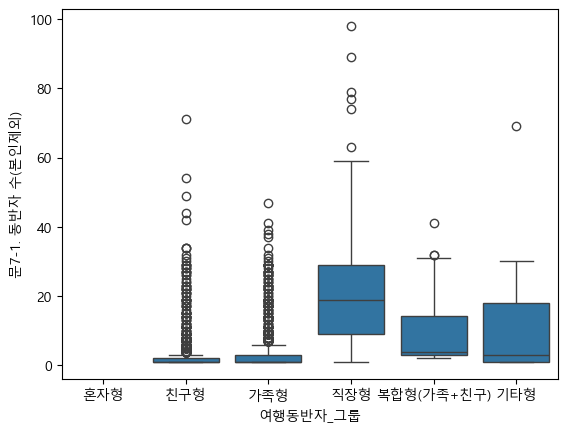

In [ ]:
# sns.boxplot(x=df3['여행동반자_그룹'], y=df3['문7-1. 동반자 수(본인제외)'])
# plt.show()

In [ ]:
# # 각 그룹별 이상치가 해당 그룹의 몇 퍼센트를 차지하는지 알아보자.
# for name, group in df3.groupby('여행동반자_그룹'):
    
#     # 동반자 수 데이터만 추출
#     companions = group['문7-1. 동반자 수(본인제외)']
        
#     # Q1, Q3, IQR 계산
#     Q1 = companions.quantile(0.25)
#     Q3 = companions.quantile(0.75)
#     IQR = Q3 - Q1
    
#     # 이상치 경계값
#     upper_bound = Q3 + 1.5 * IQR
    
#     # 해당 그룹 내 이상치의 인덱스 찾기
#     outlier_indices = companions[companions > upper_bound].index
        
#     # 원본 데이터프레임에 새로운 그룹명 적용
#     if not outlier_indices.empty:
#         new_group_name = f"{name}_이상치" # 예: '가족_이상치'
#         df3.loc[outlier_indices, '여행동반자_그룹'] = new_group_name

In [ ]:
# # 1. 분석에 사용할 컬럼 정의
# group_col = '여행동반자_그룹'
# count_col = '문7-1. 동반자 수(본인제외)' # 동반자 수 컬럼

# # 2. (안전 조치) 동반자 수 컬럼을 숫자로 변환 (이미 되어있다면 생략 가능)
# # 만약 숫자로 변환할 수 없는 값(예: '없음')이 있다면 NaN으로 바뀝니다.
# df3[count_col] = pd.to_numeric(df3[count_col], errors='coerce')

# # 3. 그룹별 IQR 및 이상치 상한선(Upper fence) 계산
# # '혼자형'은 동반자 수가 0이므로 IQR 계산에서 제외합니다.
# groups_to_check = df3[df3[group_col] != '혼자형'][group_col].unique()

# # 그룹별 상한선을 저장할 딕셔너리
# upper_fence_dict = {}

# for group in groups_to_check:
#     # 현재 그룹의 동반자 수 데이터 추출 (NaN 값 제외)
#     group_data = df3.loc[df3[group_col] == group, count_col].dropna()
    
#     # 데이터가 충분히 있어야 IQR 계산이 의미 있음
#     if len(group_data) > 1:
#         Q1 = group_data.quantile(0.25)
#         Q3 = group_data.quantile(0.75)
#         IQR = Q3 - Q1
        
#         # 이상치 상한선 (Upper fence)
#         upper_fence = Q3 + (1.5 * IQR)
#         upper_fence_dict[group] = upper_fence
#     else:
#         # 데이터가 없거나 1개뿐이면, 상한선을 매우 큰 값으로 설정 (이상치 없음)
#         upper_fence_dict[group] = np.inf

# # 4. 계산된 상한선(upper_fence)을 df3에 매핑
# # .map()을 사용하여 각 행의 '여행동반자_그룹'에 맞는 상한선을 새 컬럼으로 추가
# df3['upper_fence'] = df3[group_col].map(upper_fence_dict)

# # '혼자형'은 NaN이 되므로, np.inf (무한대)로 채워서 이상치로 분류되지 않게 함
# df3['upper_fence'] = df3['upper_fence'].fillna(np.inf)

# # 5. '단체형' 조건 정의
# # 조건1: 동반자 수가 자신의 그룹별 상한선보다 크다
# # 조건2: 동반자 수가 0이 아니다 (NaN 방지 및 논리적 확인)
# cond_단체형 = (df3[count_col] > df3['upper_fence']) & (df3[count_col] > 0)

# # 6. '단체형'으로 그룹 업데이트
# # .loc를 사용하여 cond_단체형 조건에 맞는 행의 group_col 값을 '단체형'으로 변경
# df3.loc[cond_단체형, group_col] = '단체형'

# # 7. 결과 확인
# print("--- '단체형' 적용 후 그룹 분포 ---")
# print(df3[group_col].value_counts())

--- '단체형' 적용 후 그룹 분포 ---
여행동반자_그룹
가족형           3793
친구형           2632
혼자형           1906
단체형            565
직장형            453
복합형(가족+친구)     269
기타형             34
Name: count, dtype: int64


In [ ]:
# df3.shape

(9652, 40)

In [ ]:
# df3.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문7. 여행 동반자(1. 혼자 방문)', '문7. 여행 동반자(2. 배우자/파트너)', '문7. 여행 동반자(3. 부모님)',
       '문7. 여행 동반자(4. 자녀)', '문7. 여행 동반자(5. 그 외 가족/친지)', '문7. 여행 동반자(6. 친구)',
       '문7. 여행 동반자(7. 직장 동료)', '문7. 여행 동반자(8. 기타)', '문7-1. 동반자 수(본인제외)',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '문9-4. 시도별 체재기간_서울', '문9-4. 시도별 체재기간_경기',
       '문9-4. 시도별 체재기간_인천', '문9-4. 시도별 체재기간_강원', '문9-4. 시도별 체재기간_대전',
       '문9-4. 시도별 체재기간_충북', '문9-4. 시도별 체재기간_충남', '문9-4. 시도별 체재기간_세종',
       '문9-4. 시도별 체재기간_경북', '문9-4. 시도별 체재기간_경남', '문9-4. 시도별 체재기간_대구',
       '문9-4. 시도별 체재기간_울산', '문9-4. 시도별 체재기간_부산', '문9-4. 시도별 체재기간_광주',
       '문9-4. 시도별 체재기간_전북', '문9-4. 시도별 체재기간_전남', '문9-4. 시도별 체재기간_제주',
       '숙박시설_그룹', '여행동반자_그룹', 'upper_fence'],
      dtype='object')

In [ ]:
# drop_col = ['upper_fence','문7. 여행 동반자(1. 혼자 방문)', '문7. 여행 동반자(2. 배우자/파트너)', '문7. 여행 동반자(3. 부모님)',
#        '문7. 여행 동반자(4. 자녀)', '문7. 여행 동반자(5. 그 외 가족/친지)', '문7. 여행 동반자(6. 친구)',
#        '문7. 여행 동반자(7. 직장 동료)', '문7. 여행 동반자(8. 기타)', '문7-1. 동반자 수(본인제외)']
# df3 = df3.drop(drop_col, axis=1)
# df3.shape

(9652, 30)

In [ ]:
# df3.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '문9-4. 시도별 체재기간_서울', '문9-4. 시도별 체재기간_경기',
       '문9-4. 시도별 체재기간_인천', '문9-4. 시도별 체재기간_강원', '문9-4. 시도별 체재기간_대전',
       '문9-4. 시도별 체재기간_충북', '문9-4. 시도별 체재기간_충남', '문9-4. 시도별 체재기간_세종',
       '문9-4. 시도별 체재기간_경북', '문9-4. 시도별 체재기간_경남', '문9-4. 시도별 체재기간_대구',
       '문9-4. 시도별 체재기간_울산', '문9-4. 시도별 체재기간_부산', '문9-4. 시도별 체재기간_광주',
       '문9-4. 시도별 체재기간_전북', '문9-4. 시도별 체재기간_전남', '문9-4. 시도별 체재기간_제주',
       '숙박시설_그룹', '여행동반자_그룹'],
      dtype='object')

<!-- # 4. '시도별 체재기간' -->

In [ ]:
# df4 = df3.copy()
# df4.shape

(9652, 30)

<!-- ## 1. '방문 지역 수' 변수 생성 -->

In [ ]:
# stay_cols = [
#     '문9-4. 시도별 체재기간_서울', '문9-4. 시도별 체재기간_경기', '문9-4. 시도별 체재기간_인천', 
#     '문9-4. 시도별 체재기간_강원', '문9-4. 시도별 체재기간_대전', '문9-4. 시도별 체재기간_충북',
#     '문9-4. 시도별 체재기간_충남', '문9-4. 시도별 체재기간_세종', '문9-4. 시도별 체재기간_경북',
#     '문9-4. 시도별 체재기간_경남', '문9-4. 시도별 체재기간_대구', '문9-4. 시도별 체재기간_울산',
#     '문9-4. 시도별 체재기간_부산', '문9-4. 시도별 체재기간_광주', '문9-4. 시도별 체재기간_전북',
#     '문9-4. 시도별 체재기간_전남', '문9-4. 시도별 체재기간_제주'
# ]

In [ ]:
# df4['방문 지역 수'] = (df4[stay_cols].fillna(0) > 0).sum(axis=1)
# df4.head()

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",...,문9-4. 시도별 체재기간_대구,문9-4. 시도별 체재기간_울산,문9-4. 시도별 체재기간_부산,문9-4. 시도별 체재기간_광주,문9-4. 시도별 체재기간_전북,문9-4. 시도별 체재기간_전남,문9-4. 시도별 체재기간_제주,숙박시설_그룹,여행동반자_그룹,방문 지역 수
0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,40.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. 호텔+7. 친척 또는 친구 집,혼자형,2
5,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,228.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. 호텔,친구형,1
6,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,204.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. 호텔,가족형,2
8,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,219.91,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1. 호텔,가족형,3
9,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,167.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. 호텔,친구형,2


<!-- ## 2. '주요 체재 지역' 변수 생성 -->

In [ ]:
# df4['주요 체재 지역'] = df4[stay_cols].idxmax(axis=1)
# df4['주요 체재 지역'] = df4['주요 체재 지역'].str.replace('문9-4. 시도별 체재기간_', '', regex=False)
# df4.shape

(9652, 32)

In [ ]:
# df4.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '문9-4. 시도별 체재기간_서울', '문9-4. 시도별 체재기간_경기',
       '문9-4. 시도별 체재기간_인천', '문9-4. 시도별 체재기간_강원', '문9-4. 시도별 체재기간_대전',
       '문9-4. 시도별 체재기간_충북', '문9-4. 시도별 체재기간_충남', '문9-4. 시도별 체재기간_세종',
       '문9-4. 시도별 체재기간_경북', '문9-4. 시도별 체재기간_경남', '문9-4. 시도별 체재기간_대구',
       '문9-4. 시도별 체재기간_울산', '문9-4. 시도별 체재기간_부산', '문9-4. 시도별 체재기간_광주',
       '문9-4. 시도별 체재기간_전북', '문9-4. 시도별 체재기간_전남', '문9-4. 시도별 체재기간_제주',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역'],
      dtype='object')

In [ ]:
# drop_col = [c for c in df4.columns if c.startswith('문9-4. 시도별 체재기간_')]
# df4 = df4.drop(drop_col, axis=1)
# df4.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역'],
      dtype='object')

In [ ]:
# # ⚠️'2차 전처리.csv'를 저장할 경로로 바꾸기
# df4.to_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2차_전처리.csv', index=False)

<!-- # 5. '1인 1일 지출경비' -->

In [ ]:
print(df4['문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)'].describe(percentiles=[.33, .66]))

count    9586.000000
mean      225.398654
std       191.094761
min         0.000000
33%       136.430000
50%       177.765000
66%       225.683000
max      2532.500000
Name: 문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외), dtype: float64


<Axes: xlabel='문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)', ylabel='Count'>

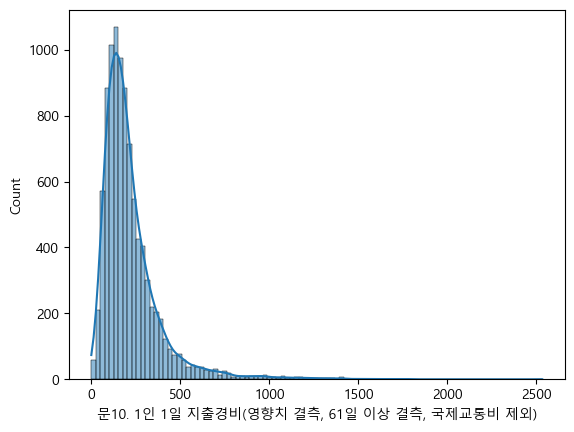

In [ ]:
sns.histplot(df4['문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)'], bins=100, kde=True)

In [ ]:
# 